In [1]:
!pip install opendatasets 
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:

import opendatasets as od
import pandas
  

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
od.download("https://www.kaggle.com/datasets/aryashah2k/mango-leaf-disease-dataset")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: thumikimayukha
Your Kaggle Key: ··········


100%|██████████| 103M/103M [00:04<00:00, 24.6MB/s]


In [5]:
Id=[]

In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os


In [7]:
for dirname, _, filenames in os.walk('/content/mango-leaf-disease-dataset'):
    for filename in filenames:
        Id.append(os.path.join(dirname, filename))

In [8]:
Id[:5]

['/content/mango-leaf-disease-dataset/Die Back/IMG_20211027_194824 (Custom).jpg',
 '/content/mango-leaf-disease-dataset/Die Back/20211129_162141 (Custom).jpg',
 '/content/mango-leaf-disease-dataset/Die Back/20211129_160902 (Custom).jpg',
 '/content/mango-leaf-disease-dataset/Die Back/20211129_160923 (Custom).jpg',
 '/content/mango-leaf-disease-dataset/Die Back/20211129_162043 (Custom).jpg']

In [9]:
train=pd.DataFrame()
train=train.assign(filename=Id)
train.head()

,filename
0,/content/mango-leaf-disease-dataset/Die Back/I...
1,/content/mango-leaf-disease-dataset/Die Back/2...
2,/content/mango-leaf-disease-dataset/Die Back/2...
3,/content/mango-leaf-disease-dataset/Die Back/2...
4,/content/mango-leaf-disease-dataset/Die Back/2...


In [10]:
train['label']=train['filename']
train['label']=train['label'].str.replace('/content/mango-leaf-disease-dataset/','')
train.head()


,filename,label
0,/content/mango-leaf-disease-dataset/Die Back/I...,Die Back/IMG_20211027_194824 (Custom).jpg
1,/content/mango-leaf-disease-dataset/Die Back/2...,Die Back/20211129_162141 (Custom).jpg
2,/content/mango-leaf-disease-dataset/Die Back/2...,Die Back/20211129_160902 (Custom).jpg
3,/content/mango-leaf-disease-dataset/Die Back/2...,Die Back/20211129_160923 (Custom).jpg
4,/content/mango-leaf-disease-dataset/Die Back/2...,Die Back/20211129_162043 (Custom).jpg


In [11]:
train['label'][:5]

0    Die Back/IMG_20211027_194824 (Custom).jpg
1        Die Back/20211129_162141 (Custom).jpg
2        Die Back/20211129_160902 (Custom).jpg
3        Die Back/20211129_160923 (Custom).jpg
4        Die Back/20211129_162043 (Custom).jpg
Name: label, dtype: object

In [12]:
train['label'] = train['label'].str.split('/').str[0]
train.head()

,filename,label
0,/content/mango-leaf-disease-dataset/Die Back/I...,Die Back
1,/content/mango-leaf-disease-dataset/Die Back/2...,Die Back
2,/content/mango-leaf-disease-dataset/Die Back/2...,Die Back
3,/content/mango-leaf-disease-dataset/Die Back/2...,Die Back
4,/content/mango-leaf-disease-dataset/Die Back/2...,Die Back


In [13]:
train['label'][:18]

0     Die Back
1     Die Back
2     Die Back
3     Die Back
4     Die Back
5     Die Back
6     Die Back
7     Die Back
8     Die Back
9     Die Back
10    Die Back
11    Die Back
12    Die Back
13    Die Back
14    Die Back
15    Die Back
16    Die Back
17    Die Back
Name: label, dtype: object

In [14]:
train=train.sample(n=len(train))
train.reset_index(inplace=True,drop=True)
train.head()

,filename,label
0,/content/mango-leaf-disease-dataset/Anthracnos...,Anthracnose
1,/content/mango-leaf-disease-dataset/Cutting We...,Cutting Weevil
2,/content/mango-leaf-disease-dataset/Die Back/2...,Die Back
3,/content/mango-leaf-disease-dataset/Die Back/2...,Die Back
4,/content/mango-leaf-disease-dataset/Healthy/20...,Healthy


In [15]:
test=train[int(len(train)*.8):]
test.head()


,filename,label
3200,/content/mango-leaf-disease-dataset/Cutting We...,Cutting Weevil
3201,/content/mango-leaf-disease-dataset/Cutting We...,Cutting Weevil
3202,/content/mango-leaf-disease-dataset/Healthy/20...,Healthy
3203,/content/mango-leaf-disease-dataset/Anthracnos...,Anthracnose
3204,/content/mango-leaf-disease-dataset/Bacterial ...,Bacterial Canker


In [16]:
test=test.sample(n=len(test))
test.reset_index(inplace=True,drop=True)
test.head()

,filename,label
0,/content/mango-leaf-disease-dataset/Anthracnos...,Anthracnose
1,/content/mango-leaf-disease-dataset/Bacterial ...,Bacterial Canker
2,/content/mango-leaf-disease-dataset/Healthy/20...,Healthy
3,/content/mango-leaf-disease-dataset/Gall Midge...,Gall Midge
4,/content/mango-leaf-disease-dataset/Gall Midge...,Gall Midge


In [17]:
train=train[:int(len(train)*.8)]
train.head()

,filename,label
0,/content/mango-leaf-disease-dataset/Anthracnos...,Anthracnose
1,/content/mango-leaf-disease-dataset/Cutting We...,Cutting Weevil
2,/content/mango-leaf-disease-dataset/Die Back/2...,Die Back
3,/content/mango-leaf-disease-dataset/Die Back/2...,Die Back
4,/content/mango-leaf-disease-dataset/Healthy/20...,Healthy


In [18]:
train=train.sample(n=len(train))
train.reset_index(inplace=True,drop=True)
train.head()

,filename,label
0,/content/mango-leaf-disease-dataset/Sooty Moul...,Sooty Mould
1,/content/mango-leaf-disease-dataset/Bacterial ...,Bacterial Canker
2,/content/mango-leaf-disease-dataset/Gall Midge...,Gall Midge
3,/content/mango-leaf-disease-dataset/Healthy/20...,Healthy
4,/content/mango-leaf-disease-dataset/Sooty Moul...,Sooty Mould


In [19]:
train.shape,test.shape

((3200, 2), (800, 2))

In [20]:
labels = train.sort_values('label')
labels.head()

,filename,label
1599,/content/mango-leaf-disease-dataset/Anthracnos...,Anthracnose
2486,/content/mango-leaf-disease-dataset/Anthracnos...,Anthracnose
358,/content/mango-leaf-disease-dataset/Anthracnos...,Anthracnose
1614,/content/mango-leaf-disease-dataset/Anthracnos...,Anthracnose
2490,/content/mango-leaf-disease-dataset/Anthracnos...,Anthracnose


In [21]:
class_names = list(labels.label.unique())
class_names[:8]

['Anthracnose',
 'Bacterial Canker',
 'Cutting Weevil',
 'Die Back',
 'Gall Midge',
 'Healthy',
 'Powdery Mildew',
 'Sooty Mould']

In [22]:
newpath = r'./train' 
if not os.path.exists(newpath):
    os.makedirs(newpath)

In [23]:
import shutil, os
#creating subfolders
for c in class_names:
    dest =  r'./train/'+str(c)
    os.makedirs(dest)
    for i in list(labels[labels['label']==c]['filename']): # Image Id
        get_image = os.path.join('/content/mango-leaf-disease-dataset', i) # Path to Images 
        move_image_to_cat = shutil.copy(get_image, dest)

In [24]:
newpath = r'./test' 
if not os.path.exists(newpath):
    os.makedirs(newpath)

In [25]:
for c in class_names:
    dest =  r'./test/'+str(c)
    os.makedirs(dest)
    for i in list(test[test['label']==c]['filename']): # Image Id
        get_image = os.path.join('/content/mango-leaf-disease-dataset', i) # Path to Images 
        move_image_to_cat = shutil.copy(get_image, dest)

In [26]:
train.to_csv('./train.csv',index=False)
test.to_csv('./test.csv',index=False)

In [27]:
len(train)

3200

In [28]:
train
# Check for missing values
train.isnull().sum()

filename    0
label       0
dtype: int64

###CNN

In [30]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split

# read images from file paths and convert them into numpy arrays
IMAGE_SIZE = 224
CHANNELS=3

X = np.zeros((len(train), IMAGE_SIZE, IMAGE_SIZE, CHANNELS), dtype=np.uint8)
for i, filepath in enumerate(train['filename']):
    img = load_img(filepath, target_size=(IMAGE_SIZE, IMAGE_SIZE))
    X[i] = img_to_array(img)

# extract labels
y = train['label'].values

# split data into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [31]:
# read test images and convert them into numpy arrays
X_test = np.zeros((len(test), IMAGE_SIZE, IMAGE_SIZE, CHANNELS), dtype=np.uint8)
for i, filepath in enumerate(test['filename']):
    img = load_img(filepath, target_size=(IMAGE_SIZE, IMAGE_SIZE))
    X_test[i] = img_to_array(img)

# extract test labels
y_test = test['label'].values


In [32]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
NUM_CLASSES=8

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_val = le.transform(y_val)
y_test = le.transform(y_test)

y_train = to_categorical(y_train, num_classes=NUM_CLASSES)
y_val = to_categorical(y_val, num_classes=NUM_CLASSES)
y_test = to_categorical(y_test, num_classes=NUM_CLASSES)


In [33]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the input shape of the model
IMAGE_SIZE = 224

# Define the CNN model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNELS)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(NUM_CLASSES, activation='softmax')
])

# Compile the model with appropriate loss, optimizer and metrics
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print the summary of the model
model.summary()

# Train the model on the training data
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_val, y_val))


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

In [34]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)


25/25 [==============================] - 0s 6ms/step - loss: 2.0803 - accuracy: 0.1138
Test accuracy: 0.11375000327825546


In [54]:
print('Test accuracy:', accuracy)
print('Model loss:', loss)

Test accuracy: 0.11375000327825546
Model loss: 2.0802786350250244


###My Contibution to CNN

In [35]:

import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import layers, Sequential, models
import pathlib

In [37]:
BATCH_SIZE=32
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/mango-leaf-disease-dataset",
    seed=12,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 4000 files belonging to 8 classes.


In [38]:
class_names = dataset.class_names
class_names

['Anthracnose',
 'Bacterial Canker',
 'Cutting Weevil',
 'Die Back',
 'Gall Midge',
 'Healthy',
 'Powdery Mildew',
 'Sooty Mould']

In [39]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1

    # Get dataset size
    ds_size = ds.cardinality().numpy()
    
    # Shuffle the dataset
    if shuffle:
        ds = ds.shuffle(buffer_size=shuffle_size, seed=12, reshuffle_each_iteration=True)

    # Compute dataset sizes for train, validation, and test sets
    train_size = int(ds_size * train_split)
    val_size = int(ds_size * val_split)
    test_size = ds_size - train_size - val_size

    # Split the dataset into train, validation, and test sets
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size + val_size).take(test_size)

    return train_ds, val_ds, test_ds

In [40]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [41]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

val_ds = val_ds.prefetch(tf.data.AUTOTUNE)

test_ds = test_ds.prefetch(tf.data.AUTOTUNE)

In [44]:
EPOCHS=3
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 8

resize_image = tf.keras.Sequential([
  layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.Rescaling(1./255)
  ])

In [43]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=3)

my_model = models.Sequential([
    resize_image,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='tanh'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='tanh'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(n_classes, activation='softmax'),
])
my_model.build(input_shape=input_shape)

In [45]:
my_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (32, 224, 224, 3)         0         
                                                                 
 conv2d_3 (Conv2D)           (32, 222, 222, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (32, 111, 111, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (32, 109, 109, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (32, 54, 54, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (32, 52, 52, 64)         

In [46]:
my_model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [47]:
early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=3, restore_best_weights=True)

history_new = my_model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=val_ds,
    callbacks=[early_stopping_callback]
) 



Epoch 1/3
100/100 [==============================] - 25s 200ms/step - loss: 1.6152 - accuracy: 0.3541 - val_loss: 1.2494 - val_accuracy: 0.5781
Epoch 2/3
100/100 [==============================] - 22s 199ms/step - loss: 0.8135 - accuracy: 0.6888 - val_loss: 0.5318 - val_accuracy: 0.8177
Epoch 3/3
100/100 [==============================] - 23s 200ms/step - loss: 0.5613 - accuracy: 0.7775 - val_loss: 0.4672 - val_accuracy: 0.8411


In [ ]:
'''scores = my_model.evaluate(test_ds)'''

In [48]:
my_model_acc = history_new.history['accuracy']
my_model_val_acc = history_new.history['val_accuracy']

my_model_loss = history_new.history['loss']
my_model_val_loss = history_new.history['val_loss']

In [52]:
print('Test accuracy:', my_model_acc)
print('Validation accuracy:', my_model_val_acc)
print('Loss:', my_model_loss)
print('Validation loss:', my_model_val_loss)

Test accuracy: [0.3540624976158142, 0.6887500286102295, 0.7774999737739563]
Validation accuracy: [0.578125, 0.8177083134651184, 0.8411458134651184]
Loss: [1.6152081489562988, 0.8135330080986023, 0.561306893825531]
Validation loss: [1.2494468688964844, 0.53177410364151, 0.4672270119190216]


In [53]:
#Best results recorded
print('Test accuracy:', my_model_acc[2])
print('Model loss:', my_model_val_loss[2])

Test accuracy: 0.7774999737739563
Model loss: 0.4672270119190216


###Comparison between two CNN Models

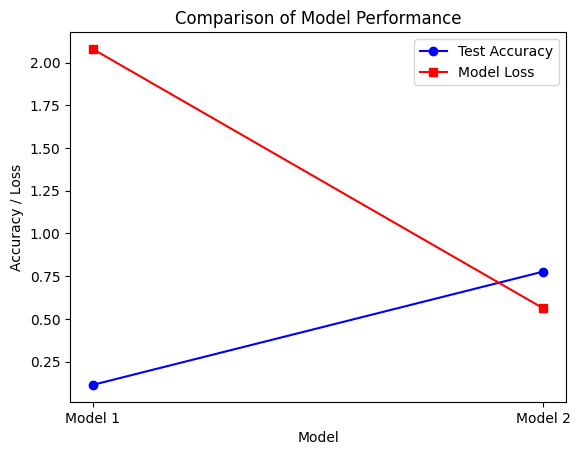

In [58]:
import matplotlib.pyplot as plt

plt.plot([1, 2], [accuracy, my_model_acc[2]], 'bo-', label='Test Accuracy')
plt.plot([1, 2], [loss, my_model_loss[2]], 'rs-', label='Model Loss')
plt.xticks([1, 2], ['Model 1', 'Model 2'])
plt.xlabel('Model')
plt.ylabel('Accuracy / Loss')
plt.title('Comparison of Model Performance')
plt.legend()
plt.show()


###Features and label preparation

In [ ]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# read images from file paths and convert them into numpy arrays
X_train = np.zeros((len(train), IMAGE_SIZE, IMAGE_SIZE, CHANNELS), dtype=np.uint8)
for i, filepath in enumerate(train['filename']):
    img = load_img(filepath, target_size=(IMAGE_SIZE, IMAGE_SIZE))
    X_train[i] = img_to_array(img)

# extract labels
y_train = train['label'].values

In [ ]:
# read test images and convert them into numpy arrays
X_test = np.zeros((len(test), IMAGE_SIZE, IMAGE_SIZE, CHANNELS), dtype=np.uint8)
for i, filepath in enumerate(test['filename']):
    img = load_img(filepath, target_size=(IMAGE_SIZE, IMAGE_SIZE))
    X_test[i] = img_to_array(img)

# extract test labels
y_test = test['label'].values

In [ ]:
# Flatten the image arrays
X_train = X_train.reshape(len(train), -1)

###SVM

In [ ]:
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from tensorflow.keras.preprocessing.image import load_img, img_to_array


In [ ]:
# Define the SVM classifier and fit the training data
svm_clf = SVC(kernel='rbf', C=10, gamma=0.001)
svm_model = svm_clf.fit(X_train, y_train)


In [ ]:
# Predict the labels for the training data
svm_y_pred_train = svm_clf.predict(X_train)

# Evaluate the accuracy of the classifier
svm_acc_train = accuracy_score(y_train, svm_y_pred_train)
print('Training accuracy:', svm_acc_train)

In [ ]:
# Predict the labels for the test data
svm_y_pred_test = svm_clf.predict(X_test)

# Evaluate the accuracy of the classifier
svm_acc_test = accuracy_score(y_test, svm_y_pred_test)
print('Test accuracy:', svm_acc_test)


In [ ]:
svm_acc_test = accuracy_score(y_test, svm_y_pred_test)
print('Test Accuracy:', svm_acc_test)

svm_pre_test = precision_score(y_test, svm_y_pred_test, average='macro')
print('Test Precision:', svm_pre_test)

svm_f1_test = f1_score(y_test, svm_y_pred_test, average='macro')
print('Test F1 score:', svm_f1_test)

svm_recall_test = recall_score(y_test, svm_y_pred_test, average='macro')
print('Test Recall:', svm_recall_test)


###Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
# Initialize a decision tree classifier
dt_clf = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=2, min_samples_leaf=1, max_features=None)

# Train the classifier on the training data
dt_model = dt_clf.fit(X_train.reshape(len(train), -1), y_train)

In [ ]:
# Predict the labels for the training data
dt_y_pred_train = dt_clf.predict(X_train.reshape(len(train), -1))

In [ ]:
# Evaluate the accuracy of the classifier
dt_acc_train = accuracy_score(y_train, dt_y_pred_train)
print('Training accuracy:', dt_acc_train)

Training accuracy: 0.6840625


In [ ]:
# predict the labels for the test data using the trained classifier
dt_y_pred_test = dt_clf.predict(X_test.reshape(len(test), -1))

# evaluate the accuracy of the classifier on the test data
dt_acc_test = accuracy_score(y_test, dt_y_pred_test)
print('Test accuracy:', dt_acc_test)


Test accuracy: 0.635


In [ ]:
dt_acc_test = accuracy_score(y_test, dt_y_pred_test)
print('Test Accuracy:', dt_acc_test)

dt_pre_test = precision_score(y_test, dt_y_pred_test, average='macro')
print('Test Precision:', dt_pre_test)

dt_f1_test = f1_score(y_test, dt_y_pred_test, average='macro')
print('Test F1 Score:', dt_f1_test)

dt_recall_test = recall_score(y_test, dt_y_pred_test, average='macro')
print('Test Recall:', dt_recall_test)


Test Accuracy: 0.635
Test Precision: 0.6271365496808321
Test F1 Score: 0.6193594614672919
Test Recall: 0.6228418569079412


In [ ]:
from sklearn.metrics import classification_report

#Printing the classification report
cr = classification_report(dt_y_pred_test, y_test, output_dict=True)
dt_cr = pd.DataFrame(cr).T.reset_index()
dt_cr

,index,precision,recall,f1-score,support
0,Anthracnose,0.631579,0.727273,0.676056,99.000
1,Bacterial Canker,0.801887,0.664062,0.726496,128.000
2,Cutting Weevil,0.815217,0.974026,0.887574,77.000
3,Die Back,0.896552,0.737589,0.809339,141.000
4,Gall Midge,0.363636,0.355556,0.359551,90.000
5,Healthy,0.511364,0.489130,0.500000,92.000
6,Powdery Mildew,0.650000,0.585586,0.616114,111.000
7,Sooty Mould,0.312500,0.483871,0.379747,62.000
8,accuracy,0.635000,0.635000,0.635000,0.635
9,macro avg,0.622842,0.627137,0.619359,800.000


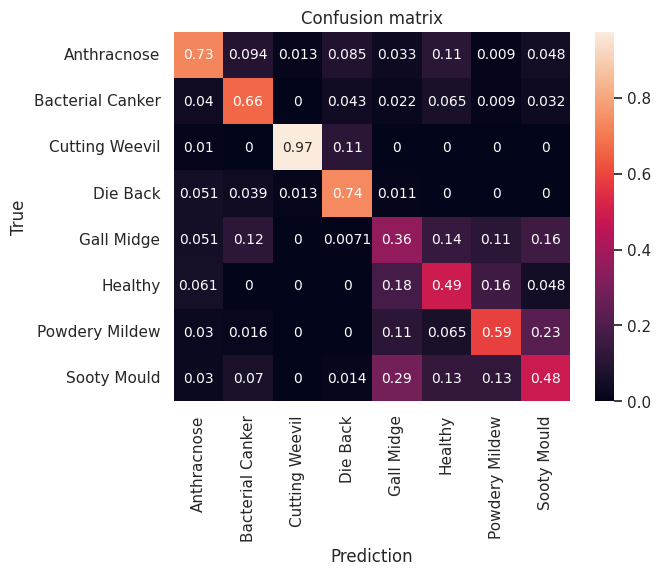

In [ ]:
res = confusion_matrix(y_test, dt_y_pred_test , normalize='pred')
cm = pd.DataFrame(res, class_names, class_names)
sns.set(font_scale=1)
ax=plt.subplot()
sns.heatmap(cm, annot=True, annot_kws={"size": 10})
ax.set_xlabel('Prediction');ax.set_ylabel('True'); 
ax.set_title('Confusion matrix'); 
plt.show()

###NBC

In [ ]:
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from tensorflow.keras.preprocessing.image import load_img, img_to_array



"# read images from file paths and convert them into numpy arrays\nX_train = np.zeros((len(train), IMAGE_SIZE, IMAGE_SIZE, CHANNELS), dtype=np.uint8)\nfor i, filepath in enumerate(train['filename']):\n    img = load_img(filepath, target_size=(IMAGE_SIZE, IMAGE_SIZE))\n    X_train[i] = img_to_array(img)\n\n# reshape the input array\nX_train = X_train.reshape(X_train.shape[0], -1)\n\n# extract labels\ny_train = train['label'].values"

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
mnb_model = MultinomialNB(alpha=0.5, fit_prior=False)
nb_model = mnb_model.fit(X_train,y_train)

In [ ]:
# Predict the labels for the training data
nb_y_pred_train = mnb_model.predict(X_train.reshape(len(train), -1))

In [ ]:
mnb_acc_train = accuracy_score(y_train, nb_y_pred_train)
print('Training accuracy:', mnb_acc_train)

Training accuracy: 0.5290625


In [ ]:
mnb_y_pred_test = nb_model.predict(X_test.reshape(len(test), -1))

# evaluate the accuracy of the classifier on the test data
mnb_acc_test = accuracy_score(y_test, mnb_y_pred_test)
print('Test accuracy:', mnb_acc_test)

Test accuracy: 0.49125


In [ ]:
mnb_acc_test = accuracy_score(y_test, mnb_y_pred_test)
print('Test Accuracy:', mnb_acc_test)

mnb_pre_test = precision_score(y_test, mnb_y_pred_test, average='macro')
print('Test Precision:', mnb_pre_test)

mnb_f1_test = f1_score(y_test, mnb_y_pred_test, average='macro')
print('Test F1 Score:', mnb_f1_test)

mnb_recall_test = recall_score(y_test, mnb_y_pred_test, average='macro')
print('Test Recall:', mnb_recall_test)


Test Accuracy: 0.49125
Test Precision: 0.48477152486200603
Test F1 Score: 0.48079915874059476
Test Recall: 0.4908918209840304


In [ ]:
from sklearn.metrics import classification_report

#Printing the classification report
cr = classification_report(mnb_y_pred_test, y_test, output_dict=True)
dfmnb = pd.DataFrame(cr).T.reset_index()
dfmnb


,index,precision,recall,f1-score,support
0,Anthracnose,0.368421,0.506024,0.426396,83.00000
1,Bacterial Canker,0.594340,0.492188,0.538462,128.00000
2,Cutting Weevil,0.847826,0.684211,0.757282,114.00000
3,Die Back,0.586207,0.723404,0.647619,94.00000
4,Gall Midge,0.204545,0.233766,0.218182,77.00000
5,Healthy,0.579545,0.414634,0.483412,123.00000
6,Powdery Mildew,0.340000,0.459459,0.390805,74.00000
7,Sooty Mould,0.406250,0.364486,0.384236,107.00000
8,accuracy,0.491250,0.491250,0.491250,0.49125
9,macro avg,0.490892,0.484772,0.480799,800.00000


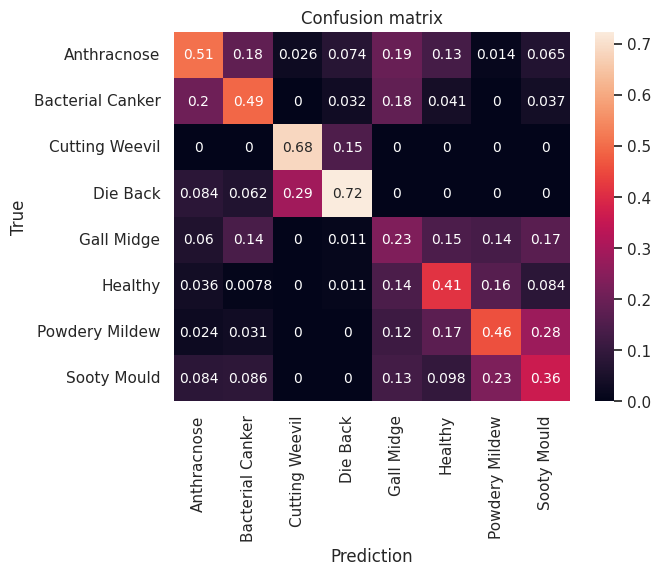

In [ ]:
res = confusion_matrix(y_test, mnb_y_pred_test , normalize='pred')
cm = pd.DataFrame(res, class_names, class_names)
sns.set(font_scale=1)
ax=plt.subplot()
sns.heatmap(cm, annot=True, annot_kws={"size": 10})
ax.set_xlabel('Prediction');ax.set_ylabel('True'); 
ax.set_title('Confusion matrix'); 
plt.show()

###KNN

In [ ]:
import cv2
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


In [ ]:
# Initialize a KNN classifier
knn_clf = KNeighborsClassifier(n_neighbors=5)

# Train the classifier on the training data
knn_model=knn_clf.fit(X_train, y_train)

# Predict the labels for the training data
knn_y_pred_train = knn_clf.predict(X_train)

In [ ]:
# Evaluate the accuracy of the classifier
knn_acc_train = accuracy_score(y_train, knn_y_pred_train)
print('Training accuracy:', knn_acc_train)

Training accuracy: 0.77375


In [ ]:
# Predict the labels for the test data
knn_y_pred_test = knn_clf.predict(X_test.reshape(len(test), -1))

# Evaluate the accuracy of the classifier
knn_acc_test = accuracy_score(y_test, knn_y_pred_test)
print('Test accuracy:', knn_acc_test)



Test accuracy: 0.67625


In [ ]:
knn_acc_test = accuracy_score(y_test, knn_y_pred_test)
print('Test Accuracy:', knn_acc_test)

knn_pre_test = precision_score(y_test, knn_y_pred_test, average='macro')
print('Test Precision:', knn_pre_test)

knn_f1_test = f1_score(y_test, knn_y_pred_test, average='macro')
print('Test F1 Score:', knn_f1_test)

knn_recall_test = recall_score(y_test, knn_y_pred_test, average='macro')
print('Test Recall:', knn_recall_test)


Test Accuracy: 0.67625
Test Precision: 0.6943156269646846
Test F1 Score: 0.6671145312518887
Test Recall: 0.6650471191826899


In [ ]:
from sklearn.metrics import classification_report

#Printing the classification report
cr = classification_report(knn_y_pred_test, y_test, output_dict=True)
knn_cr = pd.DataFrame(cr).T.reset_index()
knn_cr


,index,precision,recall,f1-score,support
0,Anthracnose,0.666667,0.684685,0.675556,111.00000
1,Bacterial Canker,0.896226,0.641892,0.748031,148.00000
2,Cutting Weevil,0.597826,1.000000,0.748299,55.00000
3,Die Back,0.896552,0.670968,0.767528,155.00000
4,Gall Midge,0.522727,0.516854,0.519774,89.00000
5,Healthy,0.579545,0.680000,0.625767,75.00000
6,Powdery Mildew,0.640000,0.719101,0.677249,89.00000
7,Sooty Mould,0.520833,0.641026,0.574713,78.00000
8,accuracy,0.676250,0.676250,0.676250,0.67625
9,macro avg,0.665047,0.694316,0.667115,800.00000


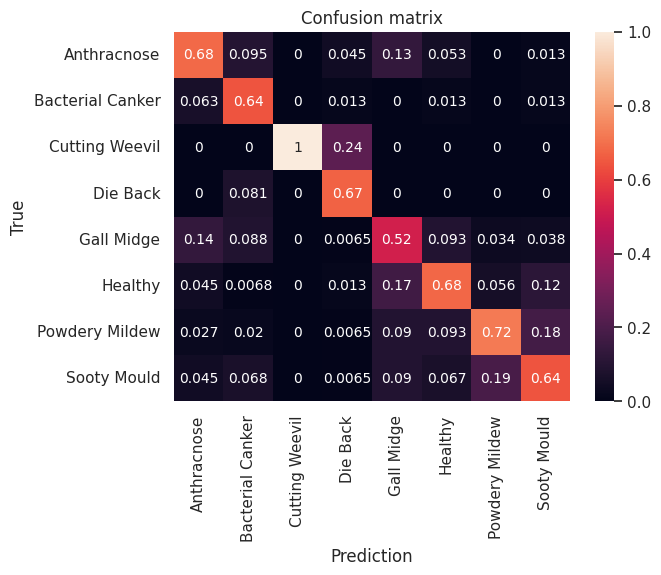

In [ ]:
res = confusion_matrix(y_test, knn_y_pred_test , normalize='pred')
cm = pd.DataFrame(res, class_names, class_names)
sns.set(font_scale=1)
ax=plt.subplot()
sns.heatmap(cm, annot=True, annot_kws={"size": 10})
ax.set_xlabel('Prediction');ax.set_ylabel('True'); 
ax.set_title('Confusion matrix'); 
plt.show()

###Visual Comparison

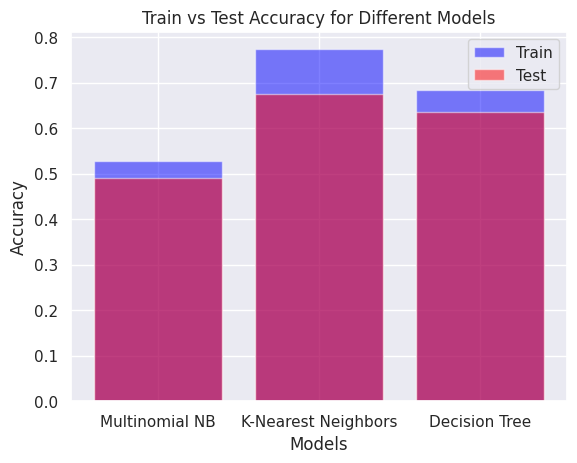

In [ ]:
import matplotlib.pyplot as plt

models = ['Multinomial NB', 'K-Nearest Neighbors', 'Decision Tree']

train_acc = [mnb_acc_train, knn_acc_train, dt_acc_train]
test_acc = [mnb_acc_test, knn_acc_test, dt_acc_test]

x_pos = [i for i, _ in enumerate(models)]

plt.bar(x_pos, train_acc, color='blue', alpha=0.5, label='Train')
plt.bar(x_pos, test_acc, color='red', alpha=0.5, label='Test')
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Train vs Test Accuracy for Different Models")

plt.xticks(x_pos, models)
plt.legend()
plt.show()
